# Data Acquisition

## Import Relevant Modules

In [117]:
# import modules
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import requests

## Request Data
# ========================================
### Men

In [119]:
path = r'https://iusf.indiana.edu/little500/results.html?raceType=Individual+Time+Trials&year=All&gender=M&teamName=&RiderName=&l500submit=Search#results'

In [120]:
html = requests.get(path)

In [147]:
mITT = pd.read_html(html.text)[0]
mITT = mITT.astype(dtype={'Year': 'str'})

In [281]:
def getSecs(time):
    """given a string in form mm:ss.ms, returns seconds as float
    
    str -> float"""
    if type(time) != str:
        return time
    else:
        try:
            time = '00:' + time.strip()
            secs = pd.to_timedelta(time).total_seconds()
            return secs
        except:
            return -1

In [148]:
# convert 'Finish Time' col to seconds
mITT['Finish Time'] = mITT['Finish Time'].apply(lambda x: getSecs(x))
mITT = mITT.rename(columns={'Finish Time': 'secITT'})

In [184]:
# Drop corrupted rows
mITT = mITT.drop(mITT[mITT['secITT'] == -1].index)
mITT = mITT.dropna()

In [193]:
# add column for 'rank within each team'
mITT['RankWithinTeam'] = mITT.groupby(by=['Team', 'Year'])['secITT'].transform(lambda x: np.arange(1, len(x) + 1))

In [195]:
# add column for z-score by year
zscore = zscore = lambda x: (x - x.mean()) / x.std()
mITT['zscore'] = mITT.groupby('Year')['secITT'].transform(zscore)

In [196]:
mITT.head()

,Year,Gender,Place,Name,Team,secITT,RankWithinTeam,zscore
0,2018,M,1,Joseph Krahulik,Sigma Alpha Epsilon,137.893,1.0,-2.061474
1,2018,M,2,Xavier Martinez,Black Key Bulls,139.437,1.0,-1.884708
2,2018,M,3,Ben Harris,Sigma Phi Epsilon,142.467,1.0,-1.537817
3,2018,M,4,Tom Settle,Sigma Phi Epsilon,142.503,2.0,-1.533695
4,2018,M,5,Matthew Thompson,3PH Cycling,142.630,1.0,-1.519155


# ========================================

### Women

In [197]:
fpath = r'https://iusf.indiana.edu/little500/results.html?raceType=Individual+Time+Trials&year=All&gender=F&teamName=&RiderName=&l500submit=Search#results'

In [205]:
fhtml = requests.get(fpath)

In [212]:
fITT = pd.read_html(fhtml.text)[0]
fITT = fITT.astype(dtype={'Year': 'str'})

In [213]:
# convert 'Finish Time' col to seconds
fITT['Finish Time'] = fITT['Finish Time'].apply(lambda x: getSecs(x))
fITT = fITT.rename(columns={'Finish Time': 'secITT'})

In [214]:
# Drop corrupted rows
fITT = fITT.drop(fITT[fITT['secITT'] == -1].index)
fITT = fITT.dropna()

In [215]:
# add column for 'rank within each team'
fITT['RankWithinTeam'] = fITT.groupby(by=['Team', 'Year'])['secITT'].transform(lambda x: np.arange(1, len(x) + 1))

In [216]:
# add column for z-score by year
zscore = zscore = lambda x: (x - x.mean()) / x.std()
fITT['zscore'] = fITT.groupby('Year')['secITT'].transform(zscore)

In [217]:
fITT.head()

,Year,Gender,Place,Name,Team,secITT,RankWithinTeam,zscore
0,2018,F,1,Brooke Hannon,Melanzana,153.083,1.0,-1.824415
1,2018,F,2,Rachel Brown,Kappa Alpha Theta,153.637,1.0,-1.788392
2,2018,F,3,Caitlin Kamplain,Theta Phi Alpha,157.197,1.0,-1.556911
3,2018,F,4,Hanna Coppens,Delta Gamma,157.235,1.0,-1.554440
4,2018,F,5,Audrey Morlan,Delta Gamma,159.583,2.0,-1.401767


# ========================================

### Men Team Pursuit

In [220]:
mppath = r'https://iusf.indiana.edu/little500/results.html?raceType=Team+Pursuit&year=All&gender=M&teamName=&l500submit=Search#results'
mphtml = requests.get(mppath)

In [226]:
mTP = pd.read_html(mphtml.text)[0]
mTP = mTP.drop(labels='Finals Time', axis=1)
mTP = mTP.astype(dtype={'Year': 'str'})

In [227]:
# convert 'Finish Time' col to seconds
mTP['Finish Time'] = mTP['Finish Time'].apply(lambda x: getSecs(x))
mTP = mTP.rename(columns={'Finish Time': 'secTP'})

In [238]:
# clean up trailing numbers from team names and drop 2nd teams

def removeNum(team):
    """removes trailing number '1' from teams that enter two teams
    
    str -> str"""
    if team[-1] == '1':
        return team[:-2]
    else:
        return team
    
mTP['Team'] = mTP['Team'].transform(lambda x: removeNum(x))

In [243]:
# add z-score to each row based on entries from the same year
mTP['zscore'] = mTP.groupby('Year')['secTP'].transform(lambda x: zscore(x))

In [244]:
mTP.head()

,Year,Gender,Place,Team,secTP,zscore
0,2018,M,1,Sigma Phi Epsilon,550.40,-0.910551
1,2018,M,2,Black Key Bulls,556.20,-0.827738
2,2018,M,3,Sigma Alpha Epsilon,564.11,-0.714798
3,2018,M,4,Bears,571.87,-0.604001
4,2018,M,5,Beta Theta Pi,573.51,-0.580585


# ========================================

### Women Team Pursuit

In [245]:
fppath = r'https://iusf.indiana.edu/little500/results.html?raceType=Team+Pursuit&year=All&gender=F&teamName=&l500submit=Search#results'
fphtml = requests.get(fppath)

In [246]:
fTP = pd.read_html(fphtml.text)[0]
fTP = fTP.drop(labels='Finals Time', axis=1)
fTP = fTP.astype(dtype={'Year': 'str'})

In [247]:
# convert 'Finish Time' col to seconds
fTP['Finish Time'] = fTP['Finish Time'].apply(lambda x: getSecs(x))
fTP = fTP.rename(columns={'Finish Time': 'secTP'})

In [248]:
fTP['Team'] = fTP['Team'].transform(lambda x: removeNum(x))

In [249]:
# add z-score to each row based on entries from the same year
fTP['zscore'] = fTP.groupby('Year')['secTP'].transform(lambda x: zscore(x))

In [250]:
fTP.head()

,Year,Gender,Place,Team,secTP,zscore
0,2018,F,1,Melanzana,500.05,-1.655863
1,2018,F,2,Kappa Alpha Theta,511.28,-1.376660
2,2018,F,3,SKI,523.62,-1.069859
3,2018,F,4,Teter,523.65,-1.069113
4,2018,F,5,Alpha Chi Omega,524.13,-1.057179


# ========================================

### Men Race

In [251]:
mrpath = r'https://iusf.indiana.edu/little500/results.html?raceType=Little+500+Race&year=All&gender=M&teamName=&l500submit=Search#results'
mrhtml = requests.get(mrpath)

In [257]:
mR = pd.read_html(mrhtml.text)[0]
mR = mR.astype(dtype={'Year': 'int64'})

In [268]:
mR[(mR['Laps']>=197) & (mR['Year'] >1990)].groupby('Year')['Laps'].count()

Year
1991    13
1992    17
1993    10
1994    12
1995    10
1996     5
1997    12
1998     7
1999     6
2000     9
2001    12
2002     9
2003    16
2004     1
2005    11
2006    10
2007     5
2008    12
2009    16
2010    14
2011    17
2012    15
2013    13
2014    13
2015    16
2016    11
2017    15
2018    17
Name: Laps, dtype: int64

# ========================================

### Women Race

In [262]:
wrpath = r'https://iusf.indiana.edu/little500/results.html?raceType=Little+500+Race&year=All&gender=F&teamName=&l500submit=Search#results'
wrhtml = requests.get(wrpath)

In [263]:
wR = pd.read_html(wrhtml.text)[0]
wR = wR.astype(dtype={'Year': 'int64'})

In [267]:
wR[(wR['Laps']>=97) & (wR['Year'] >1990)].groupby('Year')['Laps'].count()

Year
1991     1
1992    19
1993    20
1994    13
1995    11
1996     1
1997    17
1998    12
1999    13
2000    20
2001    12
2002    14
2003    13
2004     1
2005    14
2006    19
2007    20
2008    16
2009    13
2010    15
2011    17
2012    15
2013    15
2014    16
2015    17
2016    13
2017    16
2018    19
Name: Laps, dtype: int64

# ========================================

### Men Quals

In [270]:
mqualsPath = r'https://iusf.indiana.edu/little500/results.html?raceType=Qualifications&year=All&gender=M&teamName=&l500submit=Search#results'
mqualtshtml = requests.get(mqualsPath)

In [294]:
mQ = pd.read_html(mqualtshtml.text)[0]
mQ = mQ.astype(dtype={'Year': 'int64'})
mQ = mQ.rename(columns={'Finish Time': 'secQuals'})

In [295]:
mQ['secQuals'] = mQ['secQuals'].apply(lambda x: getSecs(x))
mQ['zscore'] = mQ.groupby('Year')['secQuals'].apply(lambda x: zscore(x))

In [296]:
mQ.head()

,Year,Gender,Place,Team,secQuals,zscore
0,2018,M,1,Cutters,154.973,-1.741349
1,2018,M,2,Kappa Sigma,155.052,-1.731198
2,2018,M,3,Sigma Alpha Epsilon,157.798,-1.378366
3,2018,M,4,Sigma Phi Epsilon,159.377,-1.175481
4,2018,M,5,Pi Lambda Phi,159.491,-1.160833


# ========================================

### Women Quals

In [297]:
fqualsPath = r'https://iusf.indiana.edu/little500/results.html?raceType=Qualifications&year=All&gender=F&teamName=&l500submit=Search#results'
fqualtshtml = requests.get(fqualsPath)

In [298]:
fQ = pd.read_html(fqualtshtml.text)[0]
fQ = fQ.astype(dtype={'Year': 'int64'})
fQ = fQ.rename(columns={'Finish Time': 'secQuals'})

In [299]:
fQ['secQuals'] = fQ['secQuals'].apply(lambda x: getSecs(x))
fQ['zscore'] = fQ.groupby('Year')['secQuals'].apply(lambda x: zscore(x))

In [300]:
fQ.head()

,Year,Gender,Place,Team,secQuals,zscore
0,2018,F,1,Delta Gamma,171.359,-1.648757
1,2018,F,2,Kappa Alpha Theta,177.661,-1.248071
2,2018,F,3,Alpha Gamma Delta,178.694,-1.182392
3,2018,F,4,Alpha Chi Omega,180.349,-1.077166
4,2018,F,5,Teter,180.452,-1.070617


## Creating Quals DataFrame

In [18]:
url_quals = r'https://iusf.indiana.edu/little500/results.html?raceType=Qualifications&year=All&gender=M&teamName=&l500submit=Search#results'
html = requests.get(url_quals).text
soup = bs(html, 'html5lib')
table_rows = soup.tbody.find_all('tr')

L_quals = []

for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    L_quals.append(row)
quals = pd.DataFrame(L_quals)
quals = quals.rename(columns={0 :'Year', 1 : 'Gender', 2 : 'Place', 3 : 'Team', 4 : 'Time'})

In [19]:
quals['Team'] = quals['Team'].str.strip()

In [20]:
quals = quals.astype(dtype={'Year':'int', 'Place':'int'})

# Data Visualization

## Team Pursuit v. Race Results


In [21]:
# First look at pursuit v. race results
# create dataframe by joining pursuit and race on [['Team', 'Year']]

race_pursuit = pd.DataFrame.merge(race, pursuit, on=['Team', 'Year', 'Gender'], how='inner', suffixes=('_Race', '_Pursuit'))
race_pursuit = race_pursuit.drop(labels=['Time_Race', 'Laps Completed', 'Z-Score by Year'], axis=1)

/Users/jdkrahulik/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


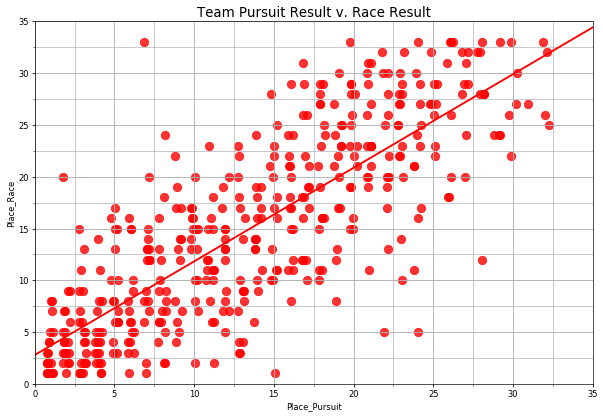

In [22]:
fig = plt.subplots(figsize=(12,8), dpi= 60) 
ax = plt.axes(xlim=(0,35), xscale='linear', xticks=np.arange(0,40,5), ylim=(0,35), yscale='linear', yticks=np.arange(0,40,5))
ax.grid(True)
ax.xaxis.set_minor_locator(plt.MultipleLocator(2.5))
ax.yaxis.set_minor_locator(plt.MultipleLocator(2.5))
ax.grid(True, which='minor')
sns.regplot(x=race_pursuit['Place_Pursuit'], y=race_pursuit['Place_Race'], x_jitter=0.25, ax=ax, ci=0, color='Red',
           scatter_kws={'s' : 100})
plt.title('Team Pursuit Result v. Race Result', fontsize=16)
plt.show()

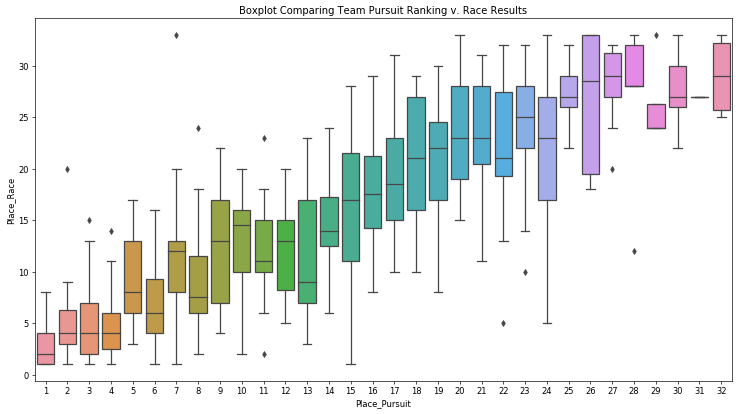

In [23]:
fig = plt.subplots(figsize=(15,8), dpi=60)

sns.boxplot(x=race_pursuit['Place_Pursuit'], y=race_pursuit['Place_Race'])
plt.title('Boxplot Comparing Team Pursuit Ranking v. Race Results')
plt.show()

## ITT Power Ranking v. Results

In [25]:
# Power ranking of #1 Rider v. Results

itt_1 = itts[itts['Rank within Team'] == 1]    # only look at highest placing rider on each team


race_itt_1 = pd.DataFrame.merge(race, itt_1, on=['Team', 'Year', 'Gender'], how='inner', suffixes=('_Race', '_ITT'))
race_itt_1 = race_itt_1.drop(labels=['Time_Race', 'Laps Completed', 'Z-Score by Year', 'Time_ITT', 'Rank within Team', 'Year', 'Gender'], axis=1)
race_itt_1 = race_itt_1.rename(columns={'Ranking by Rank within Team' : 'ITT Power Ranking'})

In [26]:
race_itt_1[['Place_Race', 'ITT Power Ranking']].corr()

,Place_Race,ITT Power Ranking
Place_Race,1.000000,0.799901
ITT Power Ranking,0.799901,1.000000


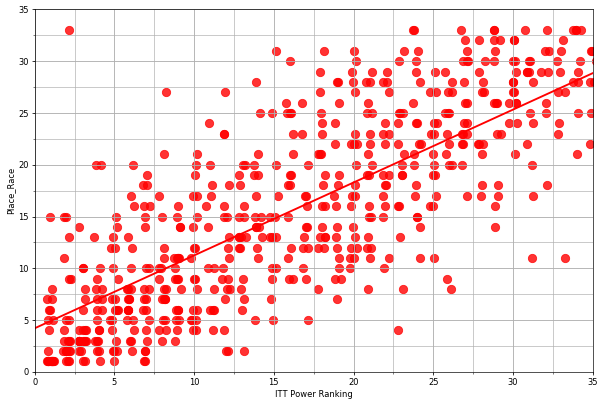

In [27]:
fig = plt.subplots(figsize=(12,8), dpi= 60) 
ax = plt.axes(xlim=(0,35), xscale='linear', xticks=np.arange(0,40,5), ylim=(0,35), yscale='linear', yticks=np.arange(0,40,5))
ax.xaxis.set_minor_locator(plt.MultipleLocator(2.5))
ax.yaxis.set_minor_locator(plt.MultipleLocator(2.5))
ax.grid(True)
ax.grid(True, which='minor')
sns.regplot(x=race_itt_1['ITT Power Ranking'], y=race_itt_1['Place_Race'], x_jitter=0.25, ax=ax, ci=0, color='Red',
           scatter_kws={'s' : 100})
plt.show()

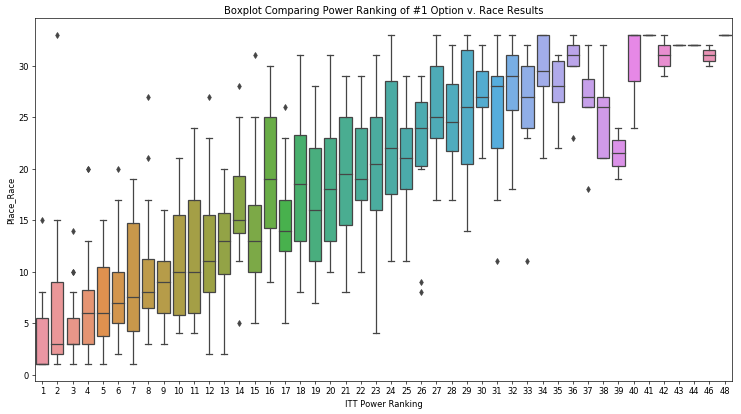

In [28]:
fig = plt.subplots(figsize=(15,8), dpi=60)

sns.boxplot(x=race_itt_1['ITT Power Ranking'], y=race_itt_1['Place_Race'])
plt.title('Boxplot Comparing Power Ranking of #1 Option v. Race Results')
plt.show()

In [30]:
# Power ranking of #2 Rider v. Results

itt_2 = itts[itts['Rank within Team'] == 2]    # only look at second highest placing rider on each team


race_itt_2 = pd.DataFrame.merge(race, itt_2, on=['Team', 'Year', 'Gender'], how='inner', suffixes=('_Race', '_ITT'))
race_itt_2 = race_itt_2.drop(labels=['Time_Race', 'Laps Completed', 'Z-Score by Year', 'Time_ITT', 'Rank within Team', 'Year', 'Gender'], axis=1)
race_itt_2 = race_itt_2.rename(columns={'Ranking by Rank within Team' : 'ITT Power Ranking'})

In [31]:
race_itt_2[['Place_Race', 'ITT Power Ranking']].corr()

,Place_Race,ITT Power Ranking
Place_Race,1.000000,0.808452
ITT Power Ranking,0.808452,1.000000


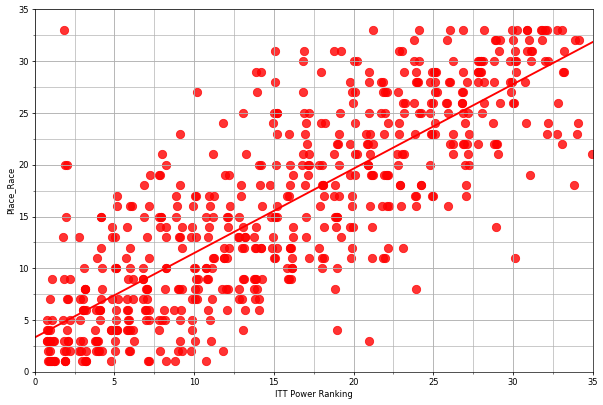

In [32]:
fig = plt.subplots(figsize=(12,8), dpi= 60) 
ax = plt.axes(xlim=(0,35), xscale='linear', xticks=np.arange(0,40,5), ylim=(0,35), yscale='linear', yticks=np.arange(0,40,5))
ax.xaxis.set_minor_locator(plt.MultipleLocator(2.5))
ax.yaxis.set_minor_locator(plt.MultipleLocator(2.5))
ax.grid(True)
ax.grid(True, which='minor')
sns.regplot(x=race_itt_2['ITT Power Ranking'], y=race_itt_2['Place_Race'], x_jitter=0.25, ax=ax, ci=0, color='Red',
           scatter_kws={'s' : 100})
plt.show()

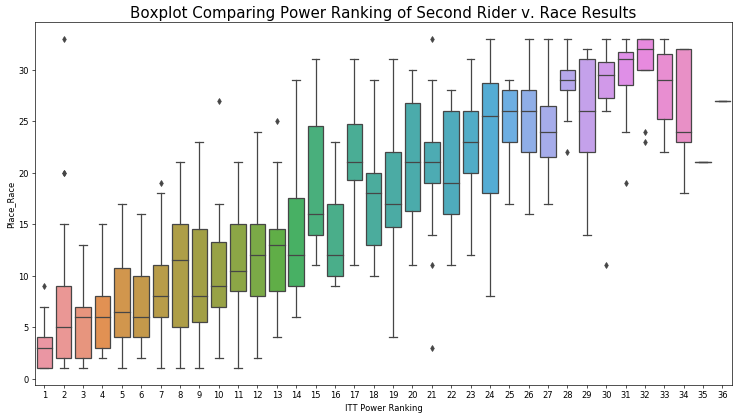

In [33]:
fig = plt.subplots(figsize=(15,8), dpi=60)

sns.boxplot(x=race_itt_2['ITT Power Ranking'], y=race_itt_2['Place_Race'])
plt.title('Boxplot Comparing Power Ranking of Second Rider v. Race Results', fontsize=18)
plt.show()

In [34]:
# Power ranking of #3 Rider v. Results

itt_3 = itts[itts['Rank within Team'] == 3]   #only look at third best rider on team


race_itt_3 = pd.DataFrame.merge(race, itt_3, on=['Team', 'Year', 'Gender'], how='inner', suffixes=('_Race', '_ITT'))
race_itt_3 = race_itt_3.drop(labels=['Time_Race', 'Laps Completed', 'Z-Score by Year', 'Time_ITT', 'Rank within Team', 'Year', 'Gender'], axis=1)
race_itt_3 = race_itt_3.rename(columns={'Ranking by Rank within Team' : 'ITT Power Ranking'})

In [35]:
race_itt_3[['Place_Race', 'ITT Power Ranking']].corr()

,Place_Race,ITT Power Ranking
Place_Race,1.000000,0.762332
ITT Power Ranking,0.762332,1.000000


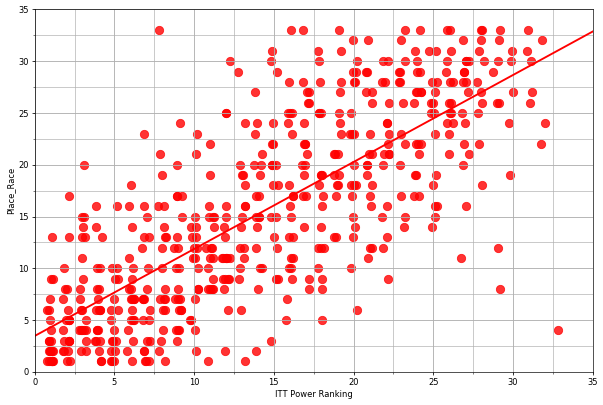

In [36]:
fig = plt.subplots(figsize=(12,8), dpi= 60) 
ax = plt.axes(xlim=(0,35), xscale='linear', xticks=np.arange(0,40,5), ylim=(0,35), yscale='linear', yticks=np.arange(0,40,5))
ax.xaxis.set_minor_locator(plt.MultipleLocator(2.5))
ax.yaxis.set_minor_locator(plt.MultipleLocator(2.5))
ax.grid(True)
ax.grid(True, which='minor')
sns.regplot(x=race_itt_3['ITT Power Ranking'], y=race_itt_3['Place_Race'], x_jitter=0.25, ax=ax, ci=0, color='Red',
           scatter_kws={'s' : 100})
plt.show()

In [37]:
# Power ranking of #4 Rider v. Results

itt_4 = itts[itts['Rank within Team'] == 4]    # only look at second highest placing rider on each team


race_itt_4 = pd.DataFrame.merge(race, itt_4, on=['Team', 'Year', 'Gender'], how='inner', suffixes=('_Race', '_ITT'))
race_itt_4 = race_itt_4.drop(labels=['Time_Race', 'Laps Completed', 'Z-Score by Year', 'Time_ITT', 'Rank within Team', 'Year', 'Gender'], axis=1)
race_itt_4 = race_itt_4.rename(columns={'Ranking by Rank within Team' : 'ITT Power Ranking'})

In [38]:
race_itt_4[['Place_Race', 'ITT Power Ranking']].corr()

,Place_Race,ITT Power Ranking
Place_Race,1.000000,0.720799
ITT Power Ranking,0.720799,1.000000


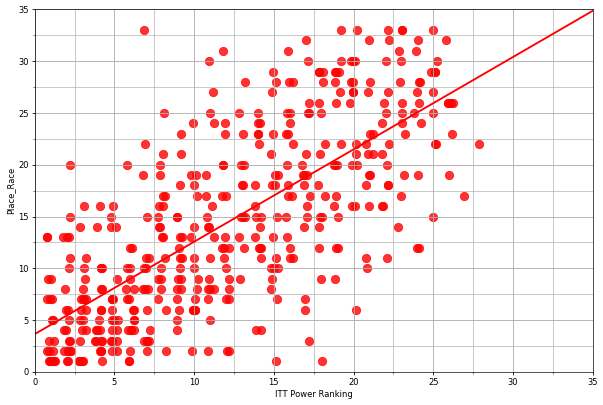

In [39]:
fig = plt.subplots(figsize=(12,8), dpi= 60) 
ax = plt.axes(xlim=(0,35), xscale='linear', xticks=np.arange(0,40,5), ylim=(0,35), yscale='linear', yticks=np.arange(0,40,5))
ax.xaxis.set_minor_locator(plt.MultipleLocator(2.5))
ax.yaxis.set_minor_locator(plt.MultipleLocator(2.5))
ax.grid(True)
ax.grid(True, which='minor')
sns.regplot(x=race_itt_4['ITT Power Ranking'], y=race_itt_4['Place_Race'], x_jitter=0.25, ax=ax, ci=0, color='Red',
           scatter_kws={'s' : 100})
plt.show()

In [40]:
race_pursuit[['Place_Race', 'Place_Pursuit']].corr()

,Place_Race,Place_Pursuit
Place_Race,1.000000,0.806017
Place_Pursuit,0.806017,1.000000


## Collection of All Scatter Plots

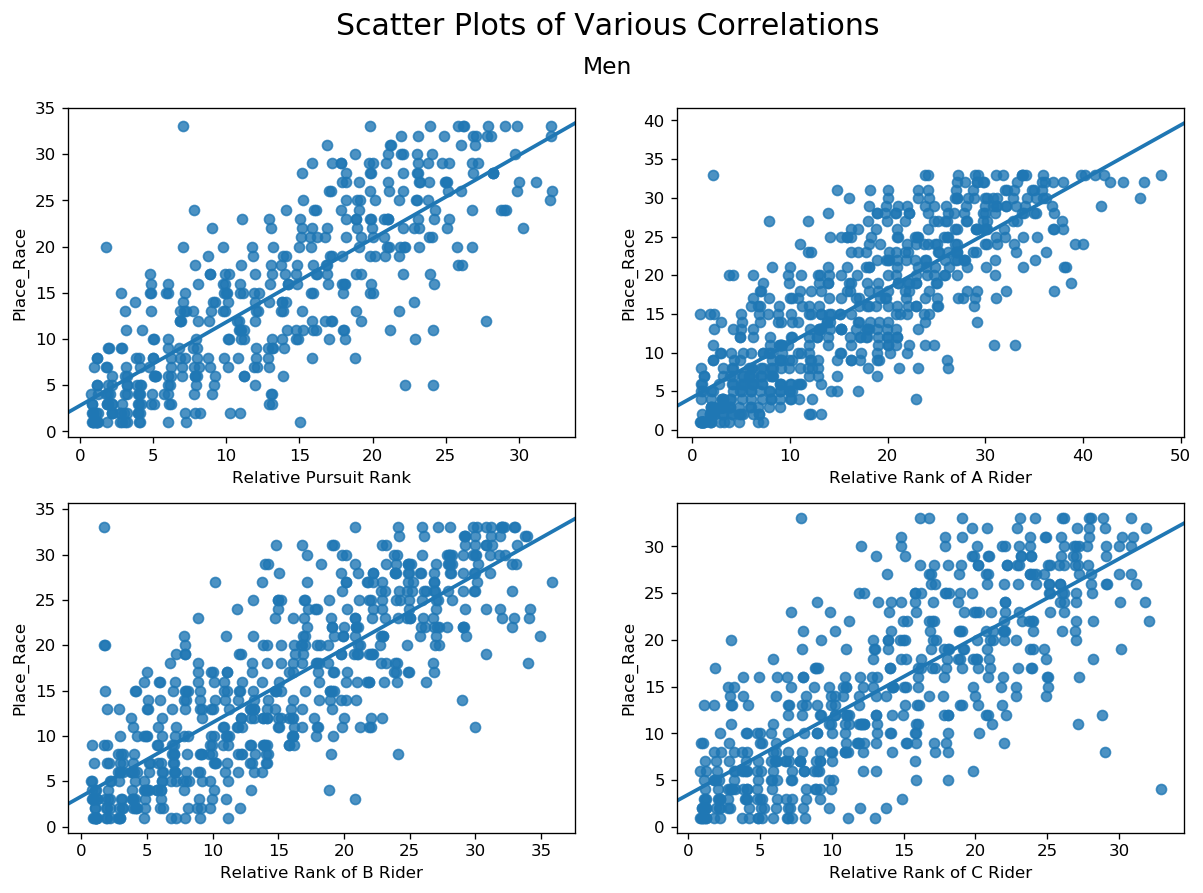

In [197]:
fig = plt.subplots(2,2, figsize=(12,8), dpi=120)

plt.subplot(2,2,1)
plt.suptitle('Scatter Plots of Various Correlations', fontsize=18)
plt.figtext(.5,.915, s='Men', ha='center', fontsize=14)
sns.regplot(x=race_pursuit['Place_Pursuit'], y=race_pursuit['Place_Race'], x_jitter=0.25,
            ci=0,) #color='Red', scatter_kws={'s' : 100})
plt.xlabel('Relative Pursuit Rank')

plt.subplot(2,2,2)
sns.regplot(x=race_itt_1['ITT Power Ranking'], y=race_itt_1['Place_Race'], x_jitter=0.25,
            ci=0,) #color='Red', scatter_kws={'s' : 100})
plt.xlabel('Relative Rank of A Rider')

plt.subplot(2,2,3)
sns.regplot(x=race_itt_2['ITT Power Ranking'], y=race_itt_2['Place_Race'], x_jitter=0.25,
            ci=0,) #color='Red', scatter_kws={'s' : 100})
plt.xlabel('Relative Rank of B Rider')

plt.subplot(2,2,4)
sns.regplot(x=race_itt_3['ITT Power Ranking'], y=race_itt_3['Place_Race'], x_jitter=0.25,
            ci=0,) #color='Red', scatter_kws={'s' : 100})
plt.xlabel('Relative Rank of C Rider')
plt.savefig('little500scatterplots_men.png')
# plt.show()

## Quals v. Race Results

In [41]:
# join quals and race result dataframes

race_quals = pd.DataFrame.merge(race, quals, on=['Team', 'Year', 'Gender'], how='inner',
                               suffixes=('_Race', '_Quals'))
race_quals = race_quals.drop(labels=['Gender', 'Time_Race', 'Laps Completed', 'Time_Quals'], axis=1)

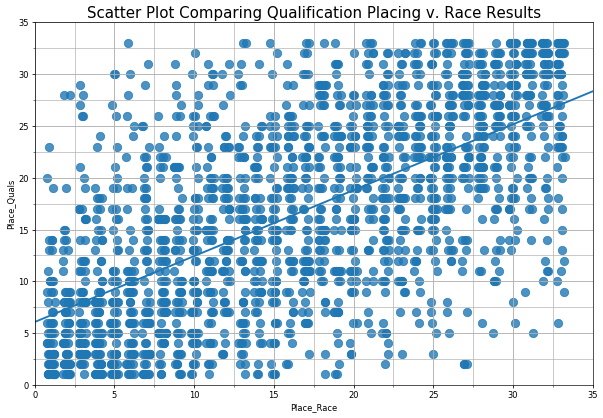

In [86]:
fig = plt.subplots(figsize=(12,8), dpi= 60) 
ax = plt.axes(xlim=(0,35), xscale='linear', xticks=np.arange(0,40,5), ylim=(0,35), yscale='linear', yticks=np.arange(0,40,5))
ax.xaxis.set_minor_locator(plt.MultipleLocator(2.5))
ax.yaxis.set_minor_locator(plt.MultipleLocator(2.5))
ax.grid(True)
ax.grid(True, which='minor')
sns.regplot(x=race_quals['Place_Race'], y=race_quals['Place_Quals'], x_jitter=0.25, ax=ax, ci=0,
           scatter_kws={'s' : 100})
plt.title('Scatter Plot Comparing Qualification Placing v. Race Results', fontsize=18)
plt.show()

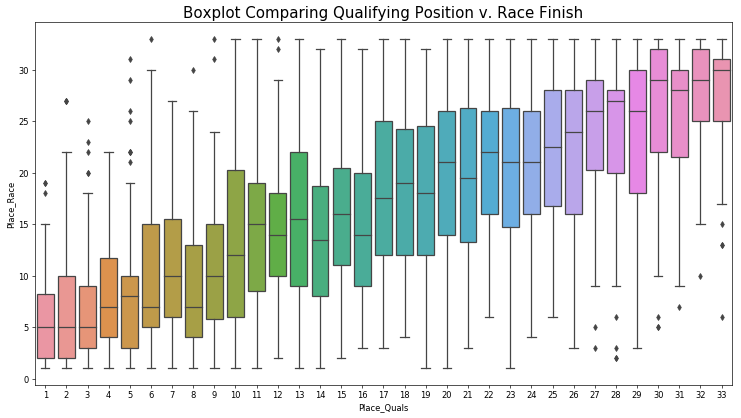

In [43]:
fig = plt.subplots(figsize=(15,8), dpi= 60)
sns.boxplot(x=race_quals['Place_Quals'], y=race_quals['Place_Race'])
#sns.stripplot(x=race_quals['Place_Quals'], y=race_quals['Place_Race'], color='Black', jitter=.1)
plt.title('Boxplot Comparing Qualifying Position v. Race Finish', fontsize=18)
plt.show()

In [44]:
race_quals[['Place_Race', 'Place_Quals']].corr()

,Place_Race,Place_Quals
Place_Race,1.00000,0.64462
Place_Quals,0.64462,1.00000


## Quals v. Team Pursuit

In [45]:
quals_tp = pd.DataFrame.merge(quals, pursuit, on=['Team', 'Year', 'Gender'], how='inner', 
                              suffixes=('_Quals', '_Pursuit'))
quals_tp = quals_tp.drop(labels=['Year', 'Gender', 'Time_Quals', 'Time_Pursuit', 'Z-Score by Year'], axis=1)

## ITT Z-Score Sum v. Race

### Examing 4 Riders

In [46]:
# year, team, itters
# remove if itters less than 4
# groupby.transform(count)

itt_count = pd.DataFrame(itts.groupby(by=['Team', 'Year'])['Name'].count())
itt_count = itt_count.reset_index()
itt_count = itt_count.rename(columns={'Name':'ITTers'})
itt_count.head()
race_itt_count = pd.DataFrame.merge(race[['Year', 'Team', 'Place']], itt_count, on=['Team', 'Year'])

In [47]:
# lambda to slice groupby segments to only include 4 members
shorten4 = lambda x: x[0:3]

In [48]:
# Create dataframe with year, team, z-score sum for 4 riders
# use apply.transform to create new column
# First shorten to only show a maximum of 4 rider's z-scores
# Next, sum the z-scores


z_sum4 = pd.DataFrame(itts.groupby(by=['Team', 'Year'])['Z-Score by Year'].apply(shorten4))
z_sum4 = z_sum4.reset_index().drop('level_2', axis=1)
z_sum4 = z_sum4.groupby(by=['Team', 'Year'])['Z-Score by Year'].sum()
z_sum4 = z_sum4.reset_index()

In [49]:
# Join z-score sum with number of ITTers and Place

four_rider_teams = race_itt_count[race_itt_count['ITTers'] >= 4]
race_zsum4 = pd.DataFrame.merge(four_rider_teams, z_sum4, on=['Year', 'Team'])

In [52]:
# Make a column that projects place based on how cumulative z-scores stack up for that year
projected = race_zsum4.sort_values('Z-Score by Year').groupby(by=['Year'])['Z-Score by Year'].transform(lambda x: np.arange(1, len(x)+1))
race_zsum4['Projected Place'] = projected
race_zsum4['Diff'] = race_zsum4['Projected Place'] - race_zsum4['Place']

In [54]:
top_15_proj = race_zsum4[race_zsum4['Projected Place'] <= 15]

In [55]:
top_10_proj = race_zsum4[race_zsum4['Projected Place'] <= 10]

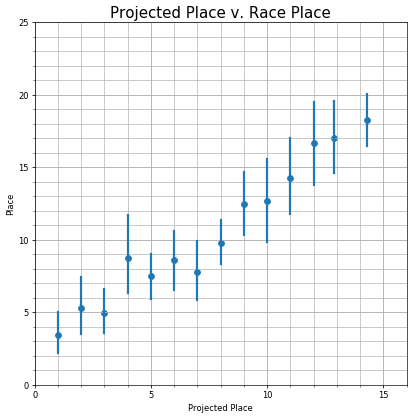

In [56]:
fig = plt.subplots(figsize=(8,8), dpi=60)
ax = plt.axes(xlim=(0,16), xscale='linear', xticks=np.arange(0,20,5), ylim=(0,25), yscale='linear', yticks=np.arange(0,30,5))
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))
ax.grid(True)
ax.grid(True, which='minor')

sns.regplot(x=top_15_proj['Projected Place'], y=top_15_proj['Place'], fit_reg=False,
            x_bins=16, ax=ax)
plt.title('Projected Place v. Race Place', fontsize=18)
plt.show()

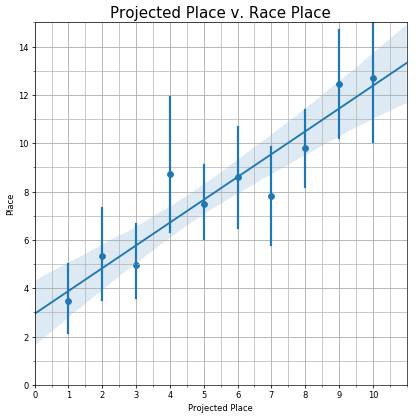

In [57]:
fig = plt.subplots(figsize=(8,8), dpi=60)
ax = plt.axes(xlim=(0,11), xscale='linear', xticks=np.arange(0,11),
              ylim=(0,15), yscale='linear', yticks=np.arange(0,16,2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(.5))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))
ax.grid(True)
ax.grid(True, which='minor')

sns.regplot(x=top_10_proj['Projected Place'], y=top_10_proj['Place'], fit_reg=True,
            x_bins=11, ax=ax)
plt.title('Projected Place v. Race Place', fontsize=18)
plt.show()

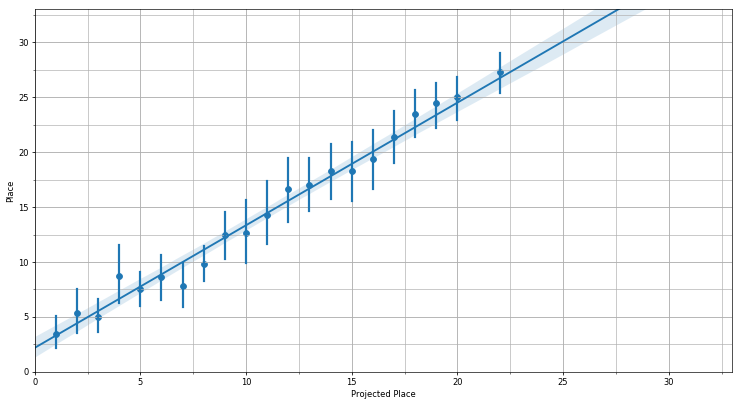

In [58]:
fig = plt.subplots(figsize=(15,8), dpi=60)
ax = plt.axes(xlim=(1,33), xscale='linear', xticks=np.arange(0,35,5), ylim=(1,33), yscale='linear', yticks=np.arange(0,35,5))
ax.xaxis.set_minor_locator(plt.MultipleLocator(2.5))
ax.yaxis.set_minor_locator(plt.MultipleLocator(2.5))
ax.grid(True)
ax.grid(True, which='minor')

ax = sns.regplot(x=race_zsum4['Projected Place'], y=race_zsum4['Place'], #x_estimaor=np.mean,
                 x_bins=21)
plt.show()

### Examing 3 Riders

In [59]:
# Run analysis for each team with at least 3 itters

In [60]:
# lambda to slice groupby segments to only include 3 members
shorten3 = lambda x: x[0:2]

In [61]:
# Create dataframe with year, team, z-score sum for 4 riders
# use apply.transform to create new column
# First shorten to only show a maximum of 4 rider's z-scores
# Next, sum the z-scores


z_sum3 = pd.DataFrame(itts.groupby(by=['Team', 'Year'])['Z-Score by Year'].apply(shorten3))
z_sum3 = z_sum3.reset_index().drop('level_2', axis=1)
z_sum3 = z_sum3.groupby(by=['Team', 'Year'])['Z-Score by Year'].sum()
z_sum3 = z_sum3.reset_index()

In [62]:
# Join z-score sum with number of ITTers and Place

three_rider_teams = race_itt_count[race_itt_count['ITTers'] >= 3]
race_zsum3 = pd.DataFrame.merge(three_rider_teams, z_sum3, on=['Year', 'Team'])

In [63]:
# Make a column that projects place based on how cumulative z-scores stack up for that year
projected = race_zsum3.sort_values('Z-Score by Year').groupby(by=['Year'])['Z-Score by Year'].transform(lambda x: np.arange(1, len(x)+1))
race_zsum3['Projected Place'] = projected
race_zsum3['Diff'] = race_zsum3['Projected Place'] - race_zsum3['Place']

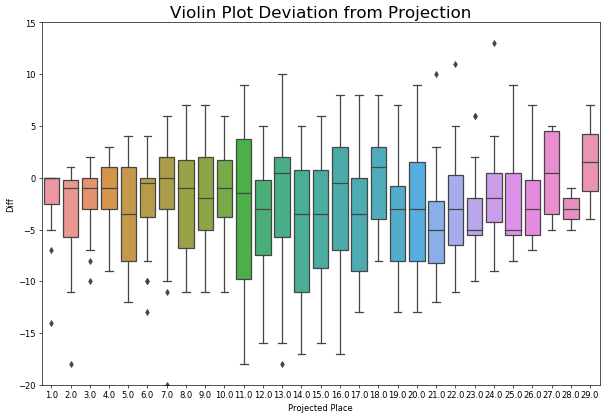

In [79]:
fig = plt.subplots(figsize=(12,8), dpi=60)
plt.axes(ylim=(-20,15), yticks=(np.arange(-20,20,5)))

# sns.violinplot(x=race_zsum3['Projected Place'], y=race_zsum3['Diff'])
# sns.kdeplot(race_zsum3['Projected Place'], race_zsum3['Diff'], shade=True)
sns.boxplot(x=race_zsum3['Projected Place'], y=race_zsum3['Diff'])
plt.title('Violin Plot Deviation from Projection', fontsize=20)
plt.show()

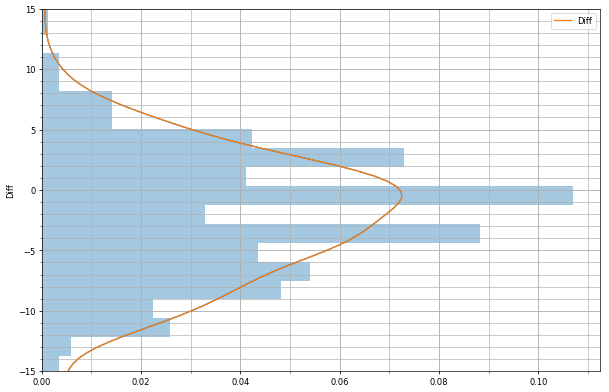

In [68]:
fig = plt.subplots(figsize=(12,8), dpi=60)
ax = plt.axes(ylim=(-15,15))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))
ax.xaxis.set_minor_locator(plt.MultipleLocator(.01))
ax.grid(True)
ax.grid(True, which='minor')

# palette = sns.palplot(sns.diverging_palette(220, 20, n=7))
# pal = sns.palplot(sns.light_palette("green"))
sns.distplot(race_zsum3['Diff'], bins=30, vertical=True)
sns.kdeplot(race_zsum3['Diff'], vertical=True)
plt.show()

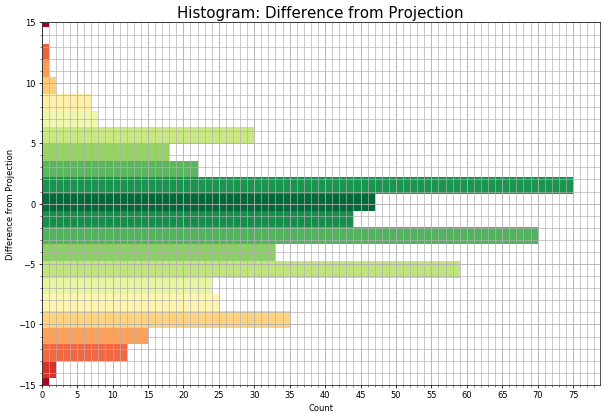

In [77]:
# This is  the colormap I'd like to use.
cm = plt.cm.get_cmap('RdYlGn_r')

# Plot histogram.
fig = plt.subplots(figsize=(12,8), dpi=60)
ax = plt.axes(ylim=(-15,15), xticks=np.arange(0,85,5))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.grid(True)
ax.grid(True, which='minor')

n, bins, patches = plt.hist(race_zsum3['Diff'], 34, orientation='horizontal')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# I would like to scale interval from [-1,1]
# scale values to interval [0,1]
col = bin_centers
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(abs(c)))

plt.title('Histogram: Difference from Projection', fontsize=18)
ax.set_xlabel('Count')
ax.set_ylabel('Difference from Projection')
plt.show()

In [74]:
race_zsum3.shape

(543, 7)

In [75]:
i = 0

while i < 11:
    number_within = race_zsum3[abs(race_zsum3['Diff']) <= i].shape[0]
    print(str(number_within) + ' out of 543 teams finished within ' +
          str(i) + ' places of their projection.')
    i += 1
    

47 out of 543 teams finished within 0 places of their projection.
126 out of 543 teams finished within 1 places of their projection.
194 out of 543 teams finished within 2 places of their projection.
258 out of 543 teams finished within 3 places of their projection.
309 out of 543 teams finished within 4 places of their projection.
364 out of 543 teams finished within 5 places of their projection.
398 out of 543 teams finished within 6 places of their projection.
430 out of 543 teams finished within 7 places of their projection.
459 out of 543 teams finished within 8 places of their projection.
478 out of 543 teams finished within 9 places of their projection.
499 out of 543 teams finished within 10 places of their projection.


In [81]:
race_zsum3.sort_values('Diff')

,Year,Team,Place,ITTers,Z-Score by Year,Projected Place,Diff
486,2000,Chi Phi,33,5,-3.465586,2.0,-31.0
356,2005,Sigma Chi,27,3,-1.658128,7.0,-20.0
539,1994,Alpha Sigma Phi,29,3,0.405183,11.0,-18.0
523,1996,Sigma Alpha Epsilon,20,4,-2.796072,2.0,-18.0
541,1994,Kappa Sigma,31,4,0.793666,13.0,-18.0
526,1996,Mezcla,31,3,0.244517,14.0,-17.0
542,1994,Zeta Beta Tau,33,3,2.198873,16.0,-17.0
304,2007,Sigma Chi,30,5,-0.430626,14.0,-16.0
198,2011,Sigma Alpha Mu,28,5,-0.695379,12.0,-16.0
199,2011,Delta Upsilon,29,5,-0.526435,13.0,-16.0


In [82]:
race_zsum3[['Place', 'Projected Place']].corr()

,Place,Projected Place
Place,1.000000,0.800744
Projected Place,0.800744,1.000000


## Weighted Sums

### Add Pursuit

In [104]:
# lambda to slice groupby segments to only include 3 members
shorten3 = lambda x: x[0:3]

In [105]:
# Create dataframe with year, team, z-score sum for 3 riders
# use apply.transform to create new column
# First shorten to only show a maximum of 3 rider's z-scores
# Next, sum the z-scores


z_sum3 = pd.DataFrame(itts.groupby(by=['Team', 'Year'])['Z-Score by Year'].apply(shorten3))
z_sum3 = z_sum3.reset_index().drop('level_2', axis=1)
z_sum3 = z_sum3.groupby(by=['Team', 'Year'])['Z-Score by Year'].sum()
z_sum3 = z_sum3.reset_index()

In [106]:
# First add pursuit into prediction

# I'll take the z-scores from the top three ITT performers on each team

z_sum3 = pd.DataFrame(itts.groupby(by=['Team', 'Year'])['Z-Score by Year'].apply(shorten3))
z_sum3 = z_sum3.reset_index().drop('level_2', axis=1)
z_sum3 = z_sum3.groupby(by=['Team', 'Year'])['Z-Score by Year'].sum()
z_sum3 = z_sum3.reset_index()

In [107]:
# create z_pursuit dataframe
z_pursuit = pursuit[['Team', 'Year', 'Z-Score by Year']]

In [108]:
# add z_sum3 and z_pursuit

z_total = pd.DataFrame.merge(z_pursuit, z_sum3, on=['Team', 'Year'])
z_total['Z-Total'] = z_total['Z-Score by Year_x'] + z_total['Z-Score by Year_y']

In [109]:
race_z_total = pd.DataFrame.merge(race[['Team', 'Year', 'Place']], z_total,
                                  on=['Team', 'Year'])

In [110]:
# Make a column that projects place based on how cumulative z-scores stack up for that year
projected = race_z_total.sort_values('Z-Total').groupby(by=['Year'])['Z-Total'].transform(lambda x: np.arange(1, len(x)+1))
race_z_total['Projected Place'] = projected

In [111]:
race_z_total = race_z_total[['Team', 'Year', 'Z-Total', 'Place', 'Projected Place']]

In [112]:
race_z_total['Diff'] = race_z_total['Projected Place'] - race_z_total['Place']

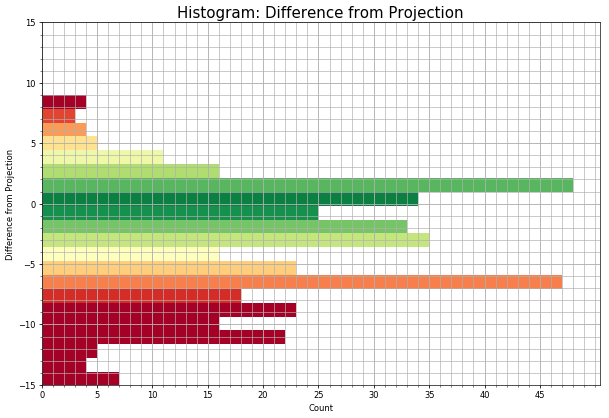

In [113]:
# This is  the colormap I'd like to use.
cm = plt.cm.get_cmap('RdYlGn_r')

# Plot histogram.
fig = plt.subplots(figsize=(12,8), dpi=60)
ax = plt.axes(ylim=(-15,15), xticks=np.arange(0,50,5))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.grid(True)
ax.grid(True, which='minor')

n, bins, patches = plt.hist(race_z_total['Diff'], 34, orientation='horizontal')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# I would like to scale interval from [-1,1]
# scale values to interval [0,1]
col = bin_centers
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(abs(c)))

plt.title('Histogram: Difference from Projection', fontsize=18)
ax.set_xlabel('Count')
ax.set_ylabel('Difference from Projection')
plt.show()

In [114]:
race_z_total[['Place', 'Projected Place']].corr()

,Place,Projected Place
Place,1.000000,0.829705
Projected Place,0.829705,1.000000


### Weight by Corr Values

In [115]:
# Get correlation values to use as coefficients

corr1 = race_itt_1[['Place_Race', 'ITT Power Ranking']].corr().iloc[1,0]
corr2 = race_itt_2[['Place_Race', 'ITT Power Ranking']].corr().iloc[1,0]
corr3 = race_itt_3[['Place_Race', 'ITT Power Ranking']].corr().iloc[1,0]
corrp = race_pursuit[['Place_Race', 'Place_Pursuit']].corr().iloc[1,0]

In [116]:
# Create dataframe with year, team, z-score sum for 3 riders
# use apply.transform to create new column
# First shorten to only show a maximum of 3 rider's z-scores
# Next, sum the z-scores

# use shorten 3 from above
# shorten3 = lambda x: x[0,3]

# define weighted sum function
weighted_sum = lambda x: corr1*x[0] + corr2*x[1] + corr3*x[2]

weighted_z3 = pd.DataFrame(itts.groupby(by=['Team', 'Year'])['Z-Score by Year'].apply(shorten3))
weighted_z3 = weighted_z3.reset_index().drop('level_2', axis=1)
# weighted_z3[weighted_z3['Team'] == 'Delta Gamma']
# Zsum = pd.DataFrame(weighted_z3.groupby(by=['Team', 'Year'])['Z-Score by Year'].apply(weighted_sum))
# weighted_z3['Z-Sum'] = Zsum
# weighted_z3.reset_index()

In [117]:
# Try different approach to problem
# Rather than groupby and reset index method
# Try groupby.T where columns are riders 1,2,3,...

# weighted_z3.groupby(['Team', 'Year']).apply(np.transpose)

z_sum3 = weighted_z3.groupby(['Team', 'Year'])['Z-Score by Year'].apply(lambda df: df.reset_index(drop=True)).unstack()
z_sum3 = z_sum3.reset_index()
z_sum3 = z_sum3.rename(columns={0:'Rider1', 1:'Rider2', 2:'Rider3'})
z_sum3 = z_sum3.dropna(axis=0)

In [119]:
# Multiply rider scores by correlation coefficients

# Initialize weighted z_sum dataframe
weighted_z_sum3 = z_sum3.copy()
weighted_z_sum3['Rider1'] = corr1 * z_sum3['Rider1']
weighted_z_sum3['Rider2'] = corr2 * z_sum3['Rider2']
weighted_z_sum3['Rider3'] = corr3 * z_sum3['Rider3']

In [120]:
# Multiply pursuit scores by correlation coefficient

weighted_pursuit = pursuit.copy()
weighted_pursuit = weighted_pursuit[['Team', 'Year', 'Z-Score by Year']]
weighted_pursuit = weighted_pursuit.rename(columns={'Z-Score by Year':'Pursuit'})
weighted_pursuit['Pursuit'] = corrp * weighted_pursuit['Pursuit']

In [121]:
# Merge weighted_pursuit with weighted_z_sum3

weighted_sum_total = pd.DataFrame.merge(weighted_pursuit, weighted_z_sum3, on=['Team', 'Year'])

In [122]:
# Add total sum

weighted_sum_total['Weighted Sum'] =  weighted_sum_total['Pursuit'] + weighted_sum_total['Rider1'] + weighted_sum_total['Rider2'] + weighted_sum_total['Rider3'] 

In [123]:
# Add projected place

projected = weighted_sum_total.sort_values('Weighted Sum').groupby('Year')['Weighted Sum'].transform(lambda x: np.arange(1, len(x)+1))
weighted_sum_total['Projected Place'] = projected

In [124]:
# Merge with race results

race_results = race.copy()
race_results = race_results[['Team', 'Year', 'Place']]

race_proj = pd.DataFrame.merge(weighted_sum_total, race_results, on=['Team', 'Year'])
race_proj['Diff'] = race_proj['Projected Place'] - race_proj['Place']

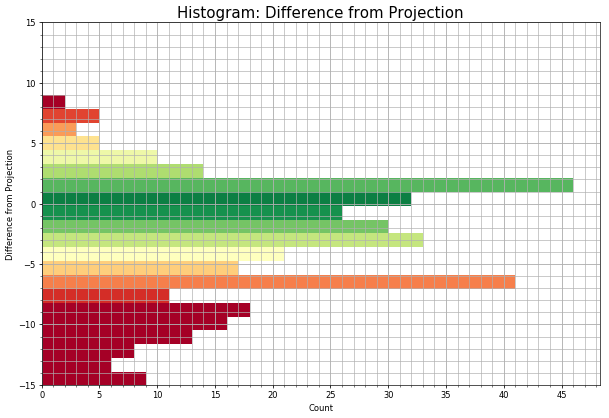

In [125]:
# This is  the colormap I'd like to use.
cm = plt.cm.get_cmap('RdYlGn_r')

# Plot histogram.
fig = plt.subplots(figsize=(12,8), dpi=60)
ax = plt.axes(ylim=(-15,15), xticks=np.arange(0,60,5))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.grid(True)
ax.grid(True, which='minor')

n, bins, patches = plt.hist(race_proj['Diff'], 34, orientation='horizontal')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# I would like to scale interval from [-1,1]
# scale values to interval [0,1]
col = bin_centers
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(abs(c)))

plt.title('Histogram: Difference from Projection', fontsize=18)
ax.set_xlabel('Count')
ax.set_ylabel('Difference from Projection')
plt.show()

In [127]:
race_proj.shape

(372, 10)

In [128]:
i = 0

while i < 11:
    number_within = race_proj[abs(race_proj['Diff']) <= i].shape[0]
    print(str(number_within) + ' out of 372 teams finished within ' +
          str(i) + ' places of their projection.')
    i += 1
    

32 out of 372 teams finished within 0 places of their projection.
86 out of 372 teams finished within 1 places of their projection.
134 out of 372 teams finished within 2 places of their projection.
181 out of 372 teams finished within 3 places of their projection.
212 out of 372 teams finished within 4 places of their projection.
234 out of 372 teams finished within 5 places of their projection.
260 out of 372 teams finished within 6 places of their projection.
283 out of 372 teams finished within 7 places of their projection.
294 out of 372 teams finished within 8 places of their projection.
314 out of 372 teams finished within 9 places of their projection.
330 out of 372 teams finished within 10 places of their projection.


In [129]:
race_proj[['Place', 'Projected Place']].corr()

,Place,Projected Place
Place,1.000000,0.814615
Projected Place,0.814615,1.000000


In [130]:
# Try with elgible place column added

race_proj_copy = race_proj.copy()
re_placed = race_proj_copy.sort_values('Place').groupby('Year')['Place'].transform(lambda x: np.arange(1, len(x)+1))
race_proj_copy['Re-Placed'] = re_placed

In [131]:
race_proj_copy['Diff'] = race_proj_copy['Projected Place'] - race_proj_copy['Re-Placed']

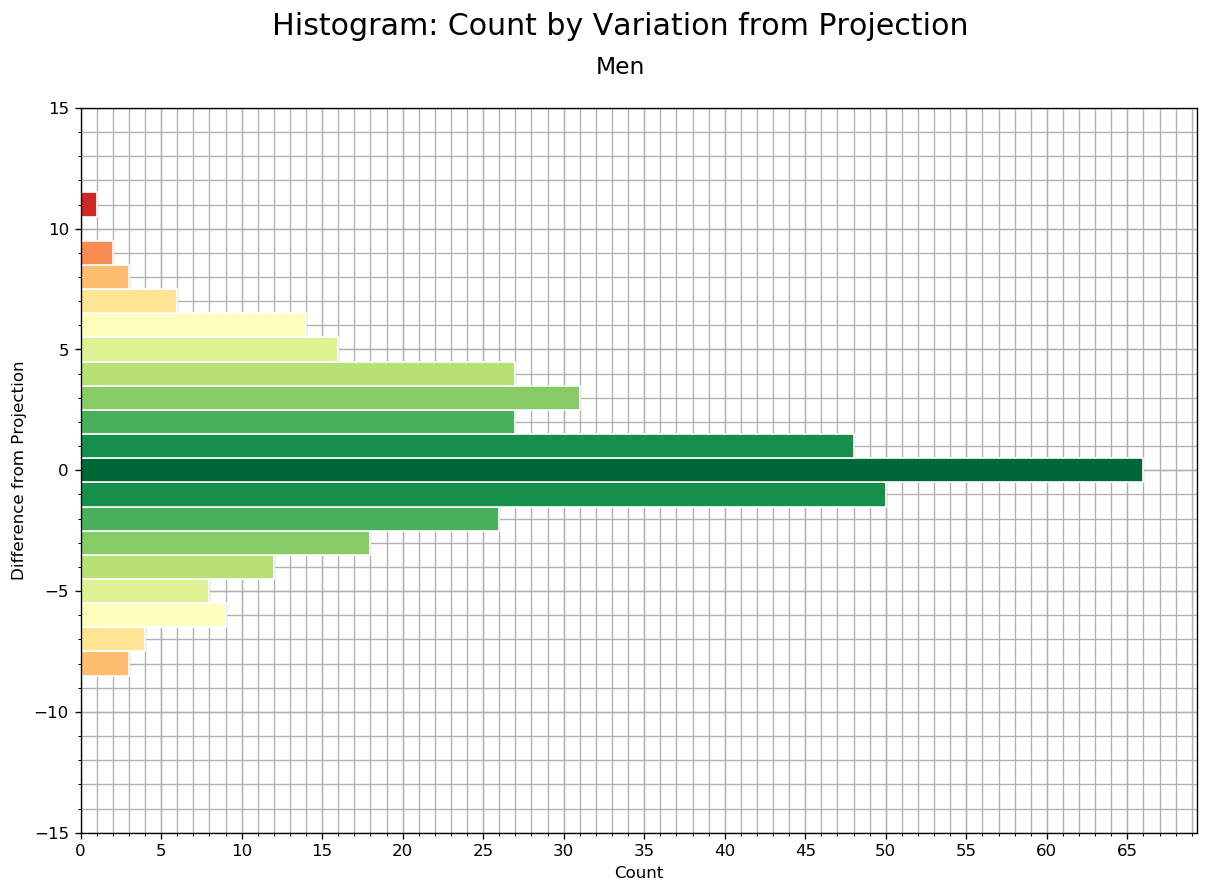

In [223]:
# This is  the colormap I'd like to use.
cm = plt.cm.get_cmap('RdYlGn_r')

# Plot histogram.
fig = plt.subplots(figsize=(12,8), dpi=120)
ax = plt.axes(ylim=(-15,15), xticks=np.arange(0,75,5))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.grid(True)
ax.grid(True, which='minor')
ax.set_axisbelow(True)

n, bins, patches = plt.hist(race_proj_copy['Diff'], bins=np.arange(-11.5,13.5,1), 
                            orientation='horizontal', rwidth=None, edgecolor='White')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# I would like to scale interval from [-1,1]
# scale values to interval [0,1]
col = bin_centers
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(abs(c)))

plt.suptitle('Histogram: Count by Variation from Projection', fontsize=18)
# plt.title('Men')
plt.figtext(.5,.915, s='Men', ha='center', fontsize=14)
ax.set_xlabel('Count')
ax.set_ylabel('Difference from Projection')
plt.savefig('differencefromprojection_men.png')
# plt.show()

In [144]:
i = 0

while i < 11:
    number_within = race_proj_copy[abs(race_proj_copy['Diff']) <= i].shape[0]
    print(str(number_within) + ' out of 372 teams finished within ' +
          str(i) + ' places of their projection.')
    i += 1
    

66 out of 372 teams finished within 0 places of their projection.
164 out of 372 teams finished within 1 places of their projection.
217 out of 372 teams finished within 2 places of their projection.
266 out of 372 teams finished within 3 places of their projection.
305 out of 372 teams finished within 4 places of their projection.
329 out of 372 teams finished within 5 places of their projection.
352 out of 372 teams finished within 6 places of their projection.
362 out of 372 teams finished within 7 places of their projection.
368 out of 372 teams finished within 8 places of their projection.
370 out of 372 teams finished within 9 places of their projection.
370 out of 372 teams finished within 10 places of their projection.


In [173]:
# winner with worst projection

race_proj[race_proj['Place'] == 1].sort_values('Projected Place', ascending=False)

,Team,Year,Pursuit,Rider1,Rider2,Rider3,Weighted Sum,Projected Place,Place,Diff
50,Delta Tau Delta,2016,-0.142598,-1.449742,-0.604262,-0.188744,-2.385347,8.0,1,7.0
67,Sigma Phi Epsilon,2015,-0.793681,-0.983402,-0.884320,-0.815323,-3.476727,7.0,1,6.0
363,Sigma Chi,1994,-0.924255,-1.414250,-0.498561,-0.424181,-3.261247,4.0,1,3.0
182,Cutters,2009,-1.228939,-1.904268,-1.346538,-0.526674,-5.006419,3.0,1,2.0
249,Dodds House,2005,-0.953665,-1.326451,-1.069976,-0.663136,-4.013230,3.0,1,2.0
285,Gafombi,2003,-1.069775,-1.516847,-1.111369,-0.562069,-4.260061,3.0,1,2.0
100,Beta Theta Pi,2013,-1.277156,-1.237746,-1.197323,-1.024341,-4.736567,2.0,1,1.0
119,Delta Tau Delta,2012,-0.895429,-1.935175,-1.260308,-0.790746,-4.881658,2.0,1,1.0
160,Cutters,2010,-0.865771,-1.757523,-1.220115,-0.676569,-4.519978,2.0,1,1.0
81,Black Key Bulls,2014,-0.849831,-1.202750,-1.061730,-0.996868,-4.111180,2.0,1,1.0


In [175]:
race_proj_copy['Diff'].describe()

count    372.000000
mean       0.524194
std        3.343249
min      -17.000000
25%       -1.000000
50%        0.000000
75%        3.000000
max       11.000000
Name: Diff, dtype: float64

In [198]:
race_proj_copy.groupby('Year')['Weighted Sum'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
1994,11.0,-1.040550,3.092127,-4.676610,-3.370747,-2.584854,2.179329,3.086058
1996,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,14.0,-1.555118,2.367720,-4.521358,-3.055555,-2.136380,-0.579047,3.080193
1998,1.0,1.859895,NaN,1.859895,1.859895,1.859895,1.859895,1.859895
2000,20.0,-1.059416,2.372911,-4.948504,-2.552623,-1.128748,-0.181208,4.702631
2001,18.0,-0.994601,2.657144,-4.429791,-3.082866,-0.966735,0.550264,4.209217
2003,21.0,-1.210223,2.665422,-4.314879,-3.070580,-2.053736,0.720660,3.681189
2004,19.0,-1.286089,2.545428,-5.545537,-2.657020,-1.547455,0.013353,4.524187
2005,19.0,-0.965351,2.348236,-5.362598,-2.807738,-0.504175,0.764574,2.844564


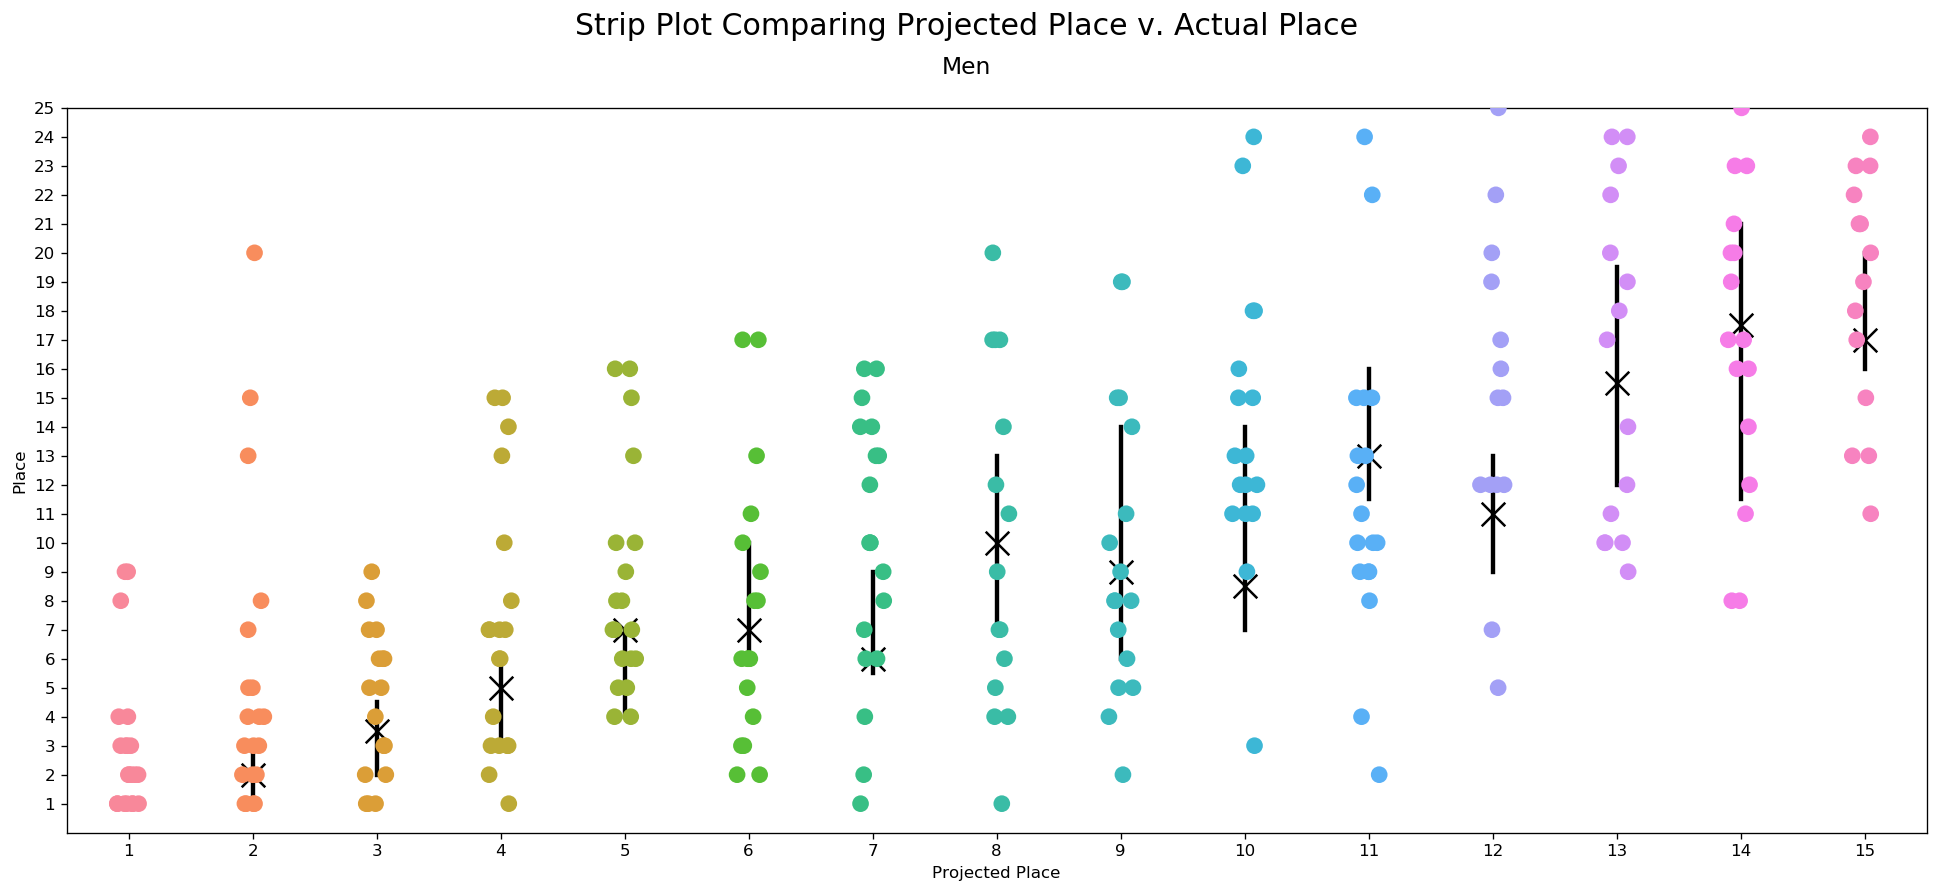

In [255]:
fig = plt.subplots(figsize=(20,8), dpi=120)
plt.suptitle('Strip Plot Comparing Projected Place v. Actual Place', fontsize=18)
ax = plt.axes(ylim=(0,25), yticks=np.arange(1,26,1))
plt.figtext(.5,.915, s='Men', ha='center', fontsize=14)
sns.regplot(x=race_proj_copy[race_proj_copy['Projected Place'] < 16]['Projected Place'], 
            y=race_proj_copy[race_proj_copy['Projected Place'] < 16]['Place'],
            fit_reg=False, ci=90, x_estimator=np.median, ax=None, color='Black', 
            marker='x', scatter_kws={'s':200})
# sns.boxplot(x=race_proj_copy[race_proj_copy['Projected Place'] < 16]['Projected Place'].astype('int'), 
#             y=race_proj_copy[race_proj_copy['Projected Place'] < 16]['Place'],
#             ax=ax,) #whis=0)
sns.stripplot(x=race_proj_copy[race_proj_copy['Projected Place'] < 16]['Projected Place'].astype('int'), 
            y=race_proj_copy[race_proj_copy['Projected Place'] < 16]['Place'],
            ax=ax, size=10) #whis=0)
# sns.violinplot(x=race_proj_copy[race_proj_copy['Projected Place'] < 16]['Projected Place'].astype('int'), 
#                y=race_proj_copy[race_proj_copy['Projected Place'] < 16]['Place'], ax=ax)
plt.savefig('stripplot_men.png')
# plt.show()

In [217]:
race_proj_copy[race_proj_copy['Year'] == 2005]

,Team,Year,Pursuit,Rider1,Rider2,Rider3,Weighted Sum,Projected Place,Place,Diff,Re-Placed
247,Phi Gamma Delta,2005,-1.713956,-1.477705,-1.247072,-0.923865,-5.362598,1.0,2,-1.0,2
248,Cutters,2005,-1.330345,-1.325625,-1.247072,-0.922290,-4.825332,2.0,7,-4.0,6
249,Dodds House,2005,-0.953665,-1.326451,-1.069976,-0.663136,-4.013230,3.0,1,2.0,1
250,Delta Upsilon,2005,-0.747245,-0.979313,-0.866985,-0.616662,-3.210205,4.0,3,1.0,3
251,Briscoe,2005,-0.677936,-0.990884,-0.841089,-0.670226,-3.180135,5.0,4,1.0,4
252,Forest,2005,-0.525757,-0.694164,-0.523654,-0.158220,-1.901795,7.0,14,-4.0,11
253,Phi Kappa Psi,2005,-0.513101,-0.853682,-0.563751,-0.504808,-2.435342,6.0,6,1.0,5
254,Phi Sigma Kappa,2005,-0.325363,-0.504064,-0.176981,-0.159796,-1.166204,8.0,12,-2.0,10
255,LiSiHi,2005,-0.194580,-0.469350,-0.334028,-0.069998,-1.067956,9.0,8,2.0,7
256,Beta Theta Pi,2005,-0.119244,-0.547870,-0.212902,0.375841,-0.504175,10.0,18,-4.0,14


# Getting an Example

In [222]:
z_sum2005 = z_sum3[z_sum3['Year'] == 2005]
z_sum2005.merge(pursuit, on=['Team', 'Year'])

,Team,Year,Rider1,Rider2,Rider3,Gender,Place,Time,Z-Score by Year
0,Achtung,2005,-0.880211,0.050772,0.700703,M,21,621.66,0.974782
1,Alpha Epsilon Pi,2005,-0.449334,0.164432,0.614941,M,12,595.10,-0.018210
2,Beta Theta Pi,2005,-0.684922,-0.263344,0.493015,M,11,591.63,-0.147943
3,Briscoe,2005,-1.238758,-1.040369,-0.879178,M,6,573.09,-0.841094
4,Chi Phi,2005,-0.514431,0.945590,1.053051,M,24,651.63,2.095264
5,Cinzano,2005,-0.203414,-0.183782,0.572577,M,20,620.38,0.926927
6,Cutters,2005,-1.657236,-1.542542,-1.209827,M,2,551.44,-1.650517
7,Delta Tau Delta,2005,-0.109386,0.288426,1.545924,M,23,623.05,1.026750
8,Delta Upsilon,2005,-1.224292,-1.072401,-0.808915,M,5,570.79,-0.927083
9,Dodds House,2005,-1.658269,-1.323487,-0.869878,M,3,563.94,-1.183183


In [219]:
corr1 = race_itt_1[['Place_Race', 'ITT Power Ranking']].corr().iloc[1,0]
corr2 = race_itt_2[['Place_Race', 'ITT Power Ranking']].corr().iloc[1,0]
corr3 = race_itt_3[['Place_Race', 'ITT Power Ranking']].corr().iloc[1,0]
corrp = race_pursuit[['Place_Race', 'Place_Pursuit']].corr().iloc[1,0]

print(corr1)
print(corr2)
print(corr3)
print(corrp)

0.7999012272314057
0.808452499414871
0.7623321398236437
0.8060171655100812


In [256]:
race_proj_copy[race_proj_copy['Place'] == 1].groupby('Projected Place').count()

,Team,Year,Pursuit,Rider1,Rider2,Rider3,Weighted Sum,Place,Diff,Re-Placed
Projected Place,,,,,,,,,,
1.0,7,7,6,7,7,7,6,7,7,7
2.0,4,4,4,4,4,4,4,4,4,4
3.0,3,3,3,3,3,3,3,3,3,3
4.0,1,1,1,1,1,1,1,1,1,1
7.0,1,1,1,1,1,1,1,1,1,1
8.0,1,1,1,1,1,1,1,1,1,1


In [259]:
race_proj[race_proj['Team'] == 'Sigma Alpha Epsilon']

,Team,Year,Pursuit,Rider1,Rider2,Rider3,Weighted Sum,Projected Place,Place,Diff
2,Sigma Alpha Epsilon,2018,-0.563529,-1.648976,-0.982613,-0.763875,-3.958993,3.0,6,-3.0
33,Sigma Alpha Epsilon,2017,0.436661,-1.438402,-0.661881,0.123113,-1.540508,12.0,5,7.0
64,Sigma Alpha Epsilon,2015,-0.925895,-1.074229,-0.922725,-0.802957,-3.725807,6.0,4,2.0
87,Sigma Alpha Epsilon,2014,-0.594460,-0.991942,-0.861416,-0.467126,-2.914944,6.0,8,-2.0
107,Sigma Alpha Epsilon,2013,-0.382055,-0.094536,0.124624,0.242255,-0.109713,15.0,18,-3.0
155,Sigma Alpha Epsilon,2011,1.905563,0.522015,0.831493,1.370059,4.629130,24.0,27,-3.0
344,Sigma Alpha Epsilon,1998,0.569940,-0.006523,0.059336,1.237142,1.859895,1.0,3,-2.0
346,Sigma Alpha Epsilon,1997,-1.044185,-1.227178,-1.163591,-1.086403,-4.521358,1.0,9,-8.0
360,Sigma Alpha Epsilon,1996,NaN,-1.157903,-1.090210,-0.483452,NaN,2.0,20,-18.0
364,Sigma Alpha Epsilon,1994,-0.584148,-2.100358,-1.028230,-0.535605,-4.248341,2.0,15,-13.0


In [261]:
pursuit[pursuit['Team'] == 'Sigma Alpha Epsilon']

,Year,Gender,Place,Team,Time,Z-Score by Year
2,2018,M,3,Sigma Alpha Epsilon,564.11,-0.699153
49,2017,M,24,Sigma Alpha Epsilon,640.19,0.541752
93,2015,M,4,Sigma Alpha Epsilon,557.06,-1.148729
129,2014,M,7,Sigma Alpha Epsilon,575.36,-0.737528
159,2013,M,8,Sigma Alpha Epsilon,589.31,-0.474004
237,2011,M,31,Sigma Alpha Epsilon,642.04,2.364172
437,2001,M,7,Sigma Alpha Epsilon,596.07,-0.891800
481,1999,M,3,Sigma Alpha Epsilon,NaN,NaN
483,1998,M,2,Sigma Alpha Epsilon,534.00,0.707107
488,1997,M,2,Sigma Alpha Epsilon,554.65,-1.295488
